# Теоретическая часть

Доказательство оптимальности главных компонент в PCA

Постановка задачи

Пусть дан набор данных $X$ размерности $n \times m$ (после центрирования), где $n$ – число объектов, а $m$ – число признаков. Тогда матрица ковариаций определяется как

$$
\Sigma = \frac{1}{n - 1} X^\top X.
$$

Цель PCA

Наша задача — найти направление (единичный вектор) $\mathbf{w} \in \mathbb{R}^m$, при проекции данных на которое наблюдается максимальная дисперсия. То есть, нужно максимизировать

$$
\text{Var}(X\mathbf{w}) = \frac{1}{n - 1}|X\mathbf{w}|^2 = \mathbf{w}^\top \Sigma \mathbf{w},
$$

при условии, что $|\mathbf{w}|=1$.

Оптимизация задачи

Мы ищем такой вектор $\mathbf{w}$, который максимизирует дисперсию проекции данных, что сводится к задаче нахождения максимума функции $\mathbf{w}^\top \Sigma \mathbf{w}$ при условии $|\mathbf{w}| = 1$. Это можно записать как задачу оптимизации:

$$
\max_{\mathbf{w}} \quad \mathbf{w}^\top \Sigma \mathbf{w} \quad \text{при условии} \quad |\mathbf{w}| = 1.
$$

Использование спектрального разложения

Так как матрица ковариаций $\Sigma$ симметрична и полуположительно определённая, она обладает набором ортонормированных собственных векторов ${\mathbf{v}i}{i=1}^m$ с соответствующими собственными значениями $\lambda_i$, упорядоченными по убыванию:

$$
\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_m \ge 0.
$$

В разложении спектрального типа можно записать:

$$
\Sigma = \sum_{i=1}^m \lambda_i \mathbf{v}_i \mathbf{v}_i^\top.
$$

Любой единичный вектор $\mathbf{w}$ можно выразить через собственные векторы:

$$
\mathbf{w} = \sum_{i=1}^m a_i \mathbf{v}i, \quad \text{где} \quad \sum{i=1}^m a_i^2 = 1.
$$

Максимизация дисперсии

Теперь подставим это представление для $\mathbf{w}$ в выражение для дисперсии:

$$
\mathbf{w}^\top \Sigma \mathbf{w} = \sum_{i=1}^m \lambda_i a_i^2.
$$

Так как $\sum_{i=1}^m a_i^2 = 1$, для максимизации $\mathbf{w}^\top \Sigma \mathbf{w}$ нужно, чтобы $a_i = 1$ для того индекса $i$, для которого $\lambda_i$ максимально, а для всех остальных $j$ — $a_j = 0$. Таким образом, оптимальное решение будет найдено для собственного вектора, соответствующего максимальному собственному значению $\lambda_{\max}$:

$$
\mathbf{w} = \mathbf{v}_{\max}.
$$

Последующие главные компоненты

После нахождения первого главного направления $\mathbf{v}_1$ (с соответствующим $\lambda_1$) задача поиска второй главной компоненты сводится к поиску такого направления, которое максимизирует дисперсию при условии, что оно ортогонально первому главному компоненту. Таким образом, решение для второй компоненты будет найдено с использованием второго по величине собственного значения $\lambda_2$ и соответствующего собственного вектора $\mathbf{v}_2$.

Вывод

Главные компоненты в методе PCA совпадают с собственными векторами матрицы ковариаций, поскольку они максимизируют дисперсию данных при проекции. Это и является основой метода главных компонент:
	•	Первый главный вектор $\mathbf{v}_1$ соответствует наибольшему собственному значению $\lambda_1$ и максимизирует вариативность данных.
	•	Последующие главные компоненты определяются как собственные векторы, соответствующие оставшимся собственным значениям в порядке убывания, с учетом ортогональности к ранее выбранным направлениям.

Таким образом, оптимальные направления главных компонент совпадают с собственными векторами ковариационной матрицы.

# Практическая часть

## Дополнительный класс

In [77]:
from typing import List, Tuple
import math

In [78]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import csv

In [79]:
class Matrix:
    def __init__(self, data):
        if not all(len(row) == len(data[0]) for row in data):
            raise ValueError("Все строки матрицы должны иметь одинаковую длину")
        self.data = data
        self.rows = len(data)
        self.cols = len(data[0]) if self.rows > 0 else 0

    def __add__(self, other):
        """Сложение матриц"""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Матрицы должны быть одного размера")
        result = [
            [self.data[i][j] + other.data[i][j] for j in range(self.cols)
            ] for i in range(self.rows)
        ]
        return Matrix(result)

    def __sub__(self, other):
        """Вычитание матриц"""
        if self.rows != other.rows or self.cols != other.cols:
            raise ValueError("Матрицы должны быть одного размера")
        result = [
            [self.data[i][j] - other.data[i][j] for j in range(self.cols)
            ] for i in range(self.rows)
        ]
        return Matrix(result)

    def __mul__(self, scalar):
        """Умножение матрицы на скаляр"""
        if not isinstance(scalar, (int, float)):
            raise TypeError("Можно умножать только на скаляр (int/float)")
        result = [
            [self.data[i][j] * scalar for j in range(self.cols)] for i in range(self.rows)
        ]
        return Matrix(result)

    def __matmul__(self, other):
        """Умножение матриц (оператор @)"""
        if self.cols != other.rows:
            raise ValueError(
                "Количество столбцов первой матрицы должно совпадать с количеством строк второй"
            )
        result = [
            [
                sum(self.data[i][k] * other.data[k][j] for k in range(self.cols))
                for j in range(other.cols)
            ] for i in range(self.rows)
        ]
        return Matrix(result)

    def transpose(self):
        """Транспонированная матрица"""
        return Matrix([list(row) for row in zip(*self.data)])

    def minor(self, i, j):
        """Минор матрицы (исключение строки i и столбца j)"""
        if self.rows != self.cols:
            raise ValueError("Минор определен только для квадратных матриц")
        new_data = [
            row[:j] + row[j + 1:] for row_idx, row in enumerate(self.data) if row_idx != i
        ]
        return Matrix(new_data)

    def determinant_gauss(self) -> float:
        """Вычисляет определителя методом Гаусса"""
        n = self.rows
        # Копируем data, чтобы не портить текущую матрицу
        mat = [row[:] for row in self.data]

        det = 1.0
        for i in range(n):
            # Ищем максимальный по модулю элемент в столбце i, строках i..n
            pivot = i
            max_val = abs(mat[i][i])
            for r in range(i + 1, n):
                if abs(mat[r][i]) > max_val:
                    max_val = abs(mat[r][i])
                    pivot = r
            if max_val < 1e-15:
                # Считаем, что det=0
                return 0.0

            if pivot != i:
                mat[i], mat[pivot] = mat[pivot], mat[i]
                det = -det  # перестановка строк меняет знак определителя

            # Опорный элемент mat[i][i]
            pivot_val = mat[i][i]
            det *= pivot_val

            # Приводим ниже идущие строки
            for r in range(i + 1, n):
                factor = mat[r][i] / pivot_val
                for c in range(i, n):
                    mat[r][c] -= mat[i][c] * factor

        return det

    def determinant(self):
        return self.determinant_gauss()

    def trace(self):
        """След матрицы (сумма диагональных элементов)"""
        return sum(self[i, i] for i in range(self.rows))


    def __str__(self):
        return "\n".join([" ".join(map(str, row)) for row in self.data])

    def __getitem__(self, indices):
        if isinstance(indices, tuple):
            i, j = indices
        else:
            i = indices

        return self.data[i][j] if isinstance(indices, tuple) else self.data[i]

    def row(self, i):
        """Возвращает i-ю строку как список"""
        return self.data[i]

    def col(self, j):
        """Возвращает j-й столбец как список"""
        return [row[j] for row in self.data]

    def copy(self):
        """Копия матрицы"""
        return Matrix([row.copy() for row in self.data])

    def set(self, i: int, j: int, value: float) -> None:
        """Устанавливает элемент матрицы (i, j) в значение value"""
        self.data[i][j] = value

    def swap_rows(self, r1: int, r2: int) -> None:
        """Меняет местами строки r1 и r2 в матрице"""
        self.data[r1], self.data[r2] = self.data[r2], self.data[r1]


## 1. Easy level

### 1.1 Задание: Реализовать метод Гаусса для решения СЛАУ:

Метод Гаусса — это метод для решения систем линейных алгебраических уравнений (СЛАУ), который основывается на преобразовании системы к верхнетреугольной матрице с помощью элементарных операций над строками.

**1. Прямой ход:**
- На каждом шаге выбираем ведущий элемент (пивот) в столбце.
- Меняем строки местами, если необходимо, чтобы элемент с максимальным абсолютным значением оказался на ведущей позиции.
- Приводим все элементы ниже ведущего элемента к нулю с помощью вычитания строк, умноженных на соответствующие коэффициенты.

**2. Проверка на несовместность:**
- Если после прямого хода получается строка вида [0, 0, ..., 0 | d], где d ≠ 0, система не имеет решений.

**3. Обратный ход:**
- Начинаем с последней строки и вычисляем значение переменных, подставляя уже найденные решения в предыдущие уравнения.

**4. Специфичные случаи:**
- **Несовместные системы**: Строка вида [0, 0, ..., 0 | d] где d ≠ 0 означает отсутствие решений.
- **Бесконечно много решений**: Строка вида [0, 0, ..., 0 | 0] указывает на бесконечность решений.

Алгоритм решения СЛАУ методом Гаусса имеет временную сложность ( O(n^3) ), где ( n ) — количество переменных.

In [80]:
def gauss_solver(A: 'Matrix', b: 'Matrix') -> List['Matrix']:
    """
    Вход:
      A: матрица коэффициентов (n×n)
      b: вектор правых частей (n×1)

    Выход:
      list[Matrix]: список базисных векторов решения системы

    Raises:
      ValueError: если система несовместна
    """
    n = A.rows

    augmented = []
    for i in range(n):
        row_i = []
        for j in range(n):
            row_i.append(A[i, j])
        row_i.append(b[i, 0])
        augmented.append(row_i)

    # Прямой ход Гаусса
    for col in range(n):
        pivot_row = max(range(col, n), key=lambda r: abs(augmented[r][col]))
        pivot_val = augmented[pivot_row][col]

        if abs(pivot_val) < 1e-10:
            continue

        if pivot_row != col:
            augmented[col], augmented[pivot_row] = augmented[pivot_row], augmented[col]
            pivot_val = augmented[col][col]

        # Нормируем ведущую строку
        for c in range(col, n + 1):
            augmented[col][c] /= pivot_val

        # Обнуляем столбец ниже pivot
        for r in range(col + 1, n):
            factor = augmented[r][col]
            if abs(factor) > 1e-12:
                for c in range(col, n + 1):
                    augmented[r][c] -= factor * augmented[col][c]

    # Проверка на несовместность
    # Если строка вида (0,0,...,0 | d), d != 0 => нет решений
    for row in augmented:
        left_part = row[:-1]
        right_part = row[-1]
        if all(abs(x) < 1e-10 for x in left_part) and abs(right_part) > 1e-10:
            raise ValueError("Система несовместна")

    # Обратный ход
    solution = [0.0] * n
    for i in range(n-1, -1, -1):
        pivot_coeff = augmented[i][i]
        if abs(pivot_coeff) < 1e-10:
            continue

        val = augmented[i][-1]
        for j in range(i+1, n):
            val -= augmented[i][j] * solution[j]
        solution[i] = val / pivot_coeff

    # Превращаем list solution -> Matrix (n×1)
    sol_matrix = Matrix([[x] for x in solution])
    return [sol_matrix]

### 1.2. Задание: Реализовать функцию центрирования данных:

$$
X_{\text{centered}} = X - \text{mean}(X).
$$

In [81]:
def center_data(X: 'Matrix') -> 'Matrix':
    """
    Вход: матрица данных X (n×m)
    Выход: центрированная матрица X_centered (n×m)
    """
    n, m = X.rows, X.cols
    means = [sum(X.col(j)) / n for j in range(m)]
    mean_matrix = Matrix([[means[j] for _ in range(n)] for j in range(m)]).transpose()
    return X - mean_matrix

### 1.3. Задание: Вычислить матрицу ковариаций:

$$
C = \frac{1}{n-1} X^\top X.
$$

In [82]:
def covariance_matrix(X_centered: 'Matrix') -> 'Matrix':
    """
    Вход: центрированная матрица X_centered (n×m)
    Выход: матрица ковариаций C (m×m)
    """
    n = X_centered.rows
    XT = X_centered.transpose()
    C = (XT @ X_centered) * (1 / (n - 1))
    return C

## 2. Normal Level

### 2.1 Задание: Найти собственные значения матрицы методом бисекции


Метод бисекции используется для нахождения корней уравнения det(C - λI) = 0., где C — матрица, λ — собственные значения, а I — единичная матрица. Для нахождения всех собственных значений матрицы, выполняются следующие шаги:

1. **Оценка интервала методом Гершгорина**:
   Метод Гершгорина дает интервал [a, b], на котором находятся все собственные значения матрицы. Радиус окружности для строки i вычисляется как сумма абсолютных значений всех элементов в строке, не включая диагональный элемент:
   $$
   R_i = \sum_{j \neq i} |c_{ij}|
   $$
   Собственные значения лежат внутри интервала c_{ii} - R_{i}, c_{ii} + R_{i}.

2. **Поиск корней методом бисекции**:
   После получения интервала \( [a, b] \), метод бисекции используется для нахождения корней функции f(λ) = det(C - λI). Метод бисекции заключается в последовательном делении интервала пополам, пока не будет достигнута нужная точность.

3. **Вычисление определителя**:
   Для каждой итерации метода бисекции вычисляется определитель матрицы C - λI. Для этого используются стандартные численные методы, такие как разложение по строкам.

Метод бисекции гарантированно находит корни, если функция непрерывна и меняет знак на интервале. Однако вычисление определителя может быть дорогим для больших матриц.

In [83]:
def bisection_method(func, a, b, epsilon):
    """
    Метод бисекции для поиска одного корня на отрезке [a, b]
    Возвращает приближение корня или None, если func(a)*func(b) > 0
    """
    fa = func(a)
    fb = func(b)
    if fa * fb > 0:
        return None

    while (b - a) / 2 > epsilon:
        c = (a + b) / 2
        fc = func(c)

        if abs(fc) < 1e-14:
            return c

        if fa * fc < 0:
            # корень лежит в [a, c]
            b = c
            fb = fc
        else:
            # корень лежит в (c, b]
            a = c
            fa = fc

    return (a + b)/2

def find_all_roots(func, a, b, epsilon, tol=1e-5, step=0.1):
    """
    Ищет все корни func(x)=0 на [a, b], разбивая интервал с шагом step
    На каждом подотрезке, где есть смена знака, уточняет корень методом бисекции
    Параметры:
        func    - функция f(x)
        a, b    - границы интервала
        epsilon - точность для метода бисекции
        tol     - допуск при сравнении найденных корней
        step    - шаг разбиения
    Возвращает список всех найденных корней по возрастанию
    """
    roots = []

    x_points = []
    x_val = a
    while x_val < b:
        x_points.append(x_val)
        x_val += step
    if x_points[-1] < b:
        x_points.append(b)

    # Ищем смену знака на смежных подотрезках
    for i in range(len(x_points) - 1):
        x0, x1 = x_points[i], x_points[i + 1]
        f0, f1 = func(x0), func(x1)
        if f0 * f1 <= 0:
            # Уточняем корень методом бисекции
            root = bisection_method(func, x0, x1, epsilon)
            if root is not None:
                # Проверяем, нет ли уже близкого корня
                if not any(abs(root - r) <= tol for r in roots):
                    roots.append(root)

    return sorted(roots)

In [84]:
def direct_det_func(C, x):
    """
    Вычисляет det(C - xI) для квадратной матрицы C размера n×n
    Возвращает float.
    """
    n = C.rows

    new_data = []
    for i in range(n):
        row = []
        for j in range(n):
            val = C[i, j]
            if i == j:
                val -= x
            row.append(val)
        new_data.append(row)

    M = Matrix(new_data)
    return M.determinant()

In [85]:
def gershgorin_interval(C, eps=1e-6):
    """
    Возвращает (a, b), оценку интервала, где лежат все собственные значения C
    """
    n = C.rows
    left_candidates = []
    right_candidates = []
    for i in range(n):
        diag_val = C[i, i]
        row_sum = 0.0
        for j in range(n):
            if j != i:
                row_sum += abs(C[i, j])
        left_candidates.append(diag_val - row_sum)
        right_candidates.append(diag_val + row_sum)
    a = min(left_candidates) - eps
    b = max(right_candidates) + eps
    return a, b

In [86]:
def find_eigenvalues(C: 'Matrix', tol: float = 1e-6) -> List[float]:
    """
    Вход:
      C: матрица ковариаций (m×m)
      tol: допустимая погрешность
    Выход: список вещественных собственных значений

    Находит все собственные значения матрицы C методом:
     1. Получаем оценку [a, b] по Гершгорину
     2. Определяем функцию f(x) = det(C - xI)
     3. Находим все корни f(x)=0 на [a, b], используя find_all_roots
    """
    a, b = gershgorin_interval(C, eps=1e-6)

    def fdet(x):
        return direct_det_func(C, x)

    roots = find_all_roots(fdet, a, b, epsilon=1e-6, step=0.001, tol=tol)
    return roots

### 2.2. Задание: Найти собственные векторы матрицы

$$
(C - \lambda I)v = 0.
$$

In [87]:
def solve_system(A: Matrix, B: Matrix) -> List[float]:
    sol = gauss_solver(A, B)
    sol_vec = sol[0]
    return [sol_vec[i, 0] for i in range(sol_vec.rows)]

In [88]:
import random
import math

def identity_matrix(n: int) -> Matrix:
    """Единичная матрица n×n"""
    return Matrix([[1.0 if i == j else 0.0 for j in range(n)] for i in range(n)])

def inverse_iteration(
    C: Matrix,
    lam: float,
    max_iter: int = 100,
    tol: float = 1e-8
) -> Matrix:
    """
    Находит собственный вектор, соответствующий λ, решая
      (C - λI) y_{k+1} = x_k
    и нормируя y, пока не сойдётся
    """
    n = C.rows
    I = identity_matrix(n)
    A = C - (I * lam)

    # стартовый случайный вектор x (n×1)
    x = Matrix([[random.random()] for _ in range(n)])

    for _ in range(max_iter):
        # решаем A y = x через ваш solve_system (gauss_solver внутри)
        y_list = solve_system(A, x)  # возвращает list[float] длины n
        # превращаем в Matrix-столбец
        y = Matrix([[v] for v in y_list])

        # нормировка y
        norm = math.sqrt(sum(y[i,0]**2 for i in range(n)))
        if norm < tol:
            break
        y = y * (1.0 / norm)

        # проверяем изменение
        delta = max(abs(y[i,0] - x[i,0]) for i in range(n))
        x = y
        if delta < tol:
            break

    return x  # это приближённый собственный вектор λ

def find_eigenvectors(C: Matrix, eigenvalues: List[float]) -> List[Matrix]:
    """
    Для каждого λ из eigenvalues запускаем inverse_iteration
    и возвращаем список столбцовых Matrix-векторов
    """
    return [inverse_iteration(C, lam) for lam in eigenvalues]

### 2.3. Задание : Вычислить долю объясненной дисперсии:

$$
\gamma = \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{m} \lambda_i}.
$$

In [89]:
def explained_variance_ratio(eigenvalues: List[float], k: int) -> float:
    """
    Вход:
      eigenvalues: список собственных значений
      k: число компонент
    Выход: доля объясненной дисперсии
    """
    m = len(eigenvalues)
    if m == 0:
        raise ValueError("Список собственных значений пуст")
    if k <= 0 or k > m:
        raise ValueError(f"Некорректное k={k} для списка из {m} собственных значений")

    total = sum(eigenvalues)
    if abs(total) < 1e-15:
        raise ValueError("Сумма собственных значений равна нулю (невозможно разделить)")

    sorted_eigs = sorted(eigenvalues, reverse=True)

    explained = sum(sorted_eigs[:k])
    return explained / total

## 3. Hard Level + 4. Expert level

### 4.1 Задание (Expert): Добавить автоматический выбор числа главных компонент

$$
k = \min \left\{ k : \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{m} \lambda_i} \ge \text{threshold} \right\}
$$

In [90]:
def auto_select_k(eigenvalues: List[float], threshold: float = 0.95) -> int:
    """
    Вход:
      eigenvalues: список собственных значений
      threshold: порог объяснённой дисперсии
    Выход: оптимальное число главных компонент k
    """
    m = len(eigenvalues)
    if m == 0:
        raise ValueError("Список eigenvalues пуст.")

    total = sum(eigenvalues)
    if abs(total) < 1e-14:
        raise ValueError("Сумма собственных значений близка к 0, нельзя разделить")

    cumulative = 0.0
    for i, val in enumerate(eigenvalues, start=1):
        cumulative += val
        ratio = cumulative / total
        if ratio >= threshold:
            return i

    # Если даже все компоненты не достигают порога, то берём k = m
    return m

### 4.2 Задание (Expert): Обработать пропущенные значения в данных

$$
X_{\text{filled}} = \begin{cases}
X_{ij}, & \text{если } X_{ij} \neq \text{NaN}, \\
\text{mean}(X_j), & \text{иначе}
\end{cases}
$$

In [91]:
def handle_missing_values(X: 'Matrix') -> 'Matrix':
    """
    Вход: матрица данных X (n×m) с возможными NaN
    Выход: матрица данных X_filled (n×m) без NaN
    """
    n, m = X.rows, X.cols

    col_means = [0.0] * m
    for j in range(m):
        count = 0
        summ = 0.0
        for i in range(n):
            val = X[i, j]
            if not math.isnan(val):
                summ += val
                count += 1

        if count == 0:
            col_means[j] = 0.0
        else:
            col_means[j] = summ / count

    X_filled = X.copy()
    for i in range(n):
        for j in range(m):
            val = X_filled[i,j]
            if math.isnan(val):
                X_filled.set(i, j, col_means[j])

    return X_filled

### 3.1 Задание (Hard): Реализовать полный алгоритм PCA

Метод главных компонент (PCA) — это техника снижения размерности, которая находит новые оси, максимально объясняющие дисперсию данных. Алгоритм включает следующие шаги:

  1.	Центрирование данных: вычитаем среднее значение для каждого признака.
  2.	Вычисление ковариационной матрицы: оцениваем взаимосвязь между признаками.
  3.	Нахождение собственных значений и векторов: собственные векторы — это главные компоненты, а собственные значения показывают важность этих компонентов.
  4.	Проекция данных: проецируем данные на первые k главных компонент, уменьшая размерность, сохраняя основную информацию.

Алгоритм PCA позволяет эффективно уменьшать размерность, сохраняя основную информацию, что полезно для визуализации данных или обучения моделей.

In [92]:
def pca(X: 'Matrix', k: int = None, threshold: float = 0.95) -> Tuple[Matrix, float, int, Matrix, List[float]]:
    """
    Вход:
      X: матрица данных (n×m)
      k: число главных компонент
    Выход:
      X_proj: проекция данных (n×k)
      : доля объяснённой дисперсии
    """
    # 0) удаление Nan
    X = handle_missing_values(X)
    # 1) Центрируем
    X_centered = center_data(X)
    n, m = X_centered.rows, X_centered.cols

    # 2) Ковариационная матрица (m×m)
    C = covariance_matrix(X_centered)

    # 3) Находим eigenvals, eigenvecs
    eigenvals = find_eigenvalues(C, tol=1e-6)
    eigenvecs = find_eigenvectors(C, eigenvals)

    # 4) Сортируем по убыванию
    combined = list(zip(eigenvals, eigenvecs))
    combined.sort(key=lambda x: x[0], reverse=True)
    sorted_evals = [pair[0] for pair in combined]
    sorted_evecs = [pair[1] for pair in combined]

    # 5) Если k не задан, выбираем auto_select_k
    if k is None:
        k = auto_select_k(sorted_evals, threshold)
    if k <= 0 or k > m:
        raise ValueError(f"Некорректное k={k} (должно быть 1..{m}).")

    # 6) Формируем матрицу W (m×k), столбцы - первые k eigenvecs
    W_data = []
    for i in range(m):
        row_i = []
        for comp_idx in range(k):
            row_i.append(sorted_evecs[comp_idx][i, 0])
        W_data.append(row_i)
    W = Matrix(W_data)  # (m×k)

    X_proj = X_centered @ W

    # 7) Доля объяснённой дисперсии
    gamma = explained_variance_ratio(sorted_evals, k)

    means = [sum(X.col(i)) / n for i in range(m)]

    return X_proj, gamma, k, W, means

### 3.2 Задание (Hard): Визуализировать проекцию данных на первые две главные компоненты.

In [93]:
def plot_pca_projection(X_proj: 'Matrix') -> Figure:
    """
    Вход: проекция данных X_proj (n×2)
    Выход: объект Figure из Matplotlib
    """
    if X_proj.cols != 2:
        raise ValueError(f"Матрица X_proj должна быть (n×2), а не (n×{X_proj.cols})")

    n = X_proj.rows

    x_vals = [X_proj[i, 0] for i in range(n)]
    y_vals = [X_proj[i, 1] for i in range(n)]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(x_vals, y_vals, c='blue', alpha=0.7, edgecolors='none')

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title("Projection onto first two principal components")

    return fig

### 3.3. Задание (Hard): Вычислить среднеквадратическую ошибку восстановления данных:

$$
\text{MSE} = \frac{1}{n \cdot m} \sum_{i,j} (X_{\text{orig}} - X_{\text{recon}})^2.
$$

In [94]:
def reconstruction_error(X_orig: 'Matrix', X_recon: 'Matrix') -> float:
    """
    Вход:
      X_orig: исходные данные (n×m)
      X_recon: восстановленные данные (n×m)
    Выход: среднеквадратическая ошибка MSE
    """
    n, m = X_orig.rows, X_orig.cols

    if X_recon.rows != n or X_recon.cols != m:
        raise ValueError(f"Размеры X_recon ({X_recon.rows}×{X_recon.cols}) "
                         f"не совпадают с X_orig ({n}×{m}).")

    sse = 0.0
    for i in range(n):
        for j in range(m):
            diff = X_orig[i, j] - X_recon[i, j]
            sse += diff * diff

    mse = sse / (n * m)
    return mse

# Тестирование и применение в реальных условиях

## Тестирование функций

Тестирование метода Гаусса для решения СЛАУ

In [95]:
def test_gauss_solver():
    # Тест 1: Простая система
    A1 = Matrix([[2, 1], [1, -1]])
    b1 = Matrix([[5], [1]])
    result1 = gauss_solver(A1, b1)[0]
    print(f"Тест 1 (A1): найдено решение x1 = {result1[0, 0]}, x2 = {result1[1, 0]}")
    assert abs(result1[0, 0] - 2.0) < 1e-6, "Тест 1: Ошибка в x1"
    assert abs(result1[1, 0] - 1.0) < 1e-6, "Тест 1: Ошибка в x2"

    # Тест 2: Несовместная система
    A2 = Matrix([[1, 1], [0, 0]])
    b2 = Matrix([[2], [1]])
    try:
        gauss_solver(A2, b2)
        assert False, "Тест 2: Ожидалась ошибка ValueError"
    except ValueError:
        print("Тест 2 прошел успешно: система несовместна")
        pass  # Тест пройден

    # Тест 3: Проверка решения
    A3 = Matrix([[1, 2], [2, 4]])
    b3 = Matrix([[3], [6]])
    result3 = gauss_solver(A3, b3)
    # Проверка, что решение удовлетворяет уравнению
    x1 = result3[0][0, 0]
    x2 = result3[0][1, 0]
    print(f"Тест 3 (A3): найдено решение x1 = {x1}, x2 = {x2}")
    assert abs(x1 + 2 * x2 - 3) < 1e-6, "Тест 3: Решение не удовлетворяет уравнению"

    print("Все тесты пройдены успешно!")

In [96]:
test_gauss_solver()

Тест 1 (A1): найдено решение x1 = 2.0, x2 = 1.0
Тест 2 прошел успешно: система несовместна
Тест 3 (A3): найдено решение x1 = 3.0, x2 = 0.0
Все тесты пройдены успешно!


Тестирование центрирования данных

In [97]:
def test_center_data():
    X = Matrix([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ])
    X_centered = center_data(X)

    # Проверяем, что средние столбцов близки к нулю
    for j in range(X.cols):
        col_mean = sum(X_centered.col(j)) / X.rows
        print(f"Среднее для столбца {j}: {col_mean}")
        assert abs(col_mean) < 1e-10, f"Столбец {j} не центрирован"

    print("Все тесты пройдены")

In [98]:
test_center_data()

Среднее для столбца 0: 0.0
Среднее для столбца 1: 0.0
Среднее для столбца 2: 0.0
Все тесты пройдены


Тестирование вычисления матрицы ковариаций

In [99]:
def test_covariance_matrix():
    X_centered = Matrix([
        [1, -1, 4],
        [-3, 2, 0],
        [2, 0, -1]
    ])
    C = covariance_matrix(X_centered)

    # Правильные ожидаемые значения после пересчета
    expected_data = [
        [7.0, -3.5, 1.0],
        [-3.5, 2.5, -2.0],
        [1.0, -2.0, 8.5]
    ]
    expected = Matrix(expected_data)

    for i in range(C.rows):
        for j in range(C.cols):
            diff = abs(C[i, j] - expected[i, j])
            print(f"Элемент ({i}, {j}) - Рассчитано: {C[i, j]}, Ожидаемое: {expected[i, j]}, Разница: {diff}")
            assert diff < 1e-6, f"Ошибка в элементе ({i}, {j})"

    print("Все тесты пройдены")

In [100]:
test_covariance_matrix()

Элемент (0, 0) - Рассчитано: 7.0, Ожидаемое: 7.0, Разница: 0.0
Элемент (0, 1) - Рассчитано: -3.5, Ожидаемое: -3.5, Разница: 0.0
Элемент (0, 2) - Рассчитано: 1.0, Ожидаемое: 1.0, Разница: 0.0
Элемент (1, 0) - Рассчитано: -3.5, Ожидаемое: -3.5, Разница: 0.0
Элемент (1, 1) - Рассчитано: 2.5, Ожидаемое: 2.5, Разница: 0.0
Элемент (1, 2) - Рассчитано: -2.0, Ожидаемое: -2.0, Разница: 0.0
Элемент (2, 0) - Рассчитано: 1.0, Ожидаемое: 1.0, Разница: 0.0
Элемент (2, 1) - Рассчитано: -2.0, Ожидаемое: -2.0, Разница: 0.0
Элемент (2, 2) - Рассчитано: 8.5, Ожидаемое: 8.5, Разница: 0.0
Все тесты пройдены


Тестирование поиска собственных значений и векторов

In [101]:
def test_eigen():
    # Тест 1
    # Простая 2×2 матрица [[2, 1],[1, 2]],
    # собственные значения 1 и 3
    C1 = Matrix([[2, 1],
                 [1, 2]])
    expected1 = [1.0, 3.0]
    result1 = find_eigenvalues(C1, tol=1e-6)
    result1_sorted = sorted(result1)
    print("Тест 1 (C1): найденные значения =", result1_sorted)
    assert len(result1_sorted) == 2, "Ожидаем 2 собственных значения"
    for i in range(2):
        assert abs(result1_sorted[i] - expected1[i]) < 1e-6, \
            f"Тест 1 провален. Получено: {result1_sorted}, ожидалось: {expected1}"

    # Тест 2
    # Диагональная 2×2 матрица [[3, 0],[0, 5]] => собственные значения 3 и 5
    C2 = Matrix([[3, 0],
                 [0, 5]])
    expected2 = [3.0, 5.0]
    result2 = find_eigenvalues(C2, tol=1e-6)
    result2_sorted = sorted(result2)
    print("Тест 2 (C2): найденные значения =", result2_sorted)
    assert len(result2_sorted) == 2, "Ожидаем 2 собственных значения"
    for i in range(2):
        assert abs(result2_sorted[i] - expected2[i]) < 1e-6, \
            f"Тест 2 провален. Получено: {result2_sorted}, ожидалось: {expected2}"

    # Тест 3
    # Симметричная 3×3 матрица, чьи собственные значения известны точно:
    # Пусть возьмём блок-диагональную форму (или близкую к ней),
    #   [[1, 2, 0],
    #    [2, 5, 0],
    #    [0, 0, 2]]
    # Собственные значения: 1, 5 (для 2×2 блока) и 2 (для последней строчки).
    C3 = Matrix([
        [1, 2, 0],
        [2, 5, 0],
        [0, 0, 2]
    ])
    expected3 = [-2*2**0.5 + 3, 2.0, 2*2**0.5 + 3]
    result3 = find_eigenvalues(C3, tol=1e-6)
    result3_sorted = sorted(result3)
    print("Тест 3 (C3): найденные значения =", result3_sorted)
    assert len(result3_sorted) == 3, "Ожидаем 3 собственных значения"
    for i in range(3):
        assert abs(result3_sorted[i] - expected3[i]) < 1e-6, \
            f"Тест 3 провален. Получено: {result3_sorted}, ожидалось: {expected3}"

    # Тест 4: проверка собственных векторов
    # Возьмём другую 3×3 симметричную матрицу (не обязательно иметь простые корни),
    # просто проверим, что (C4 @ v_i) ≈ (lambda_i) * v_i
    C4 = Matrix([
        [4, 2, 2],
        [2, 5, 3],
        [2, 3, 6]
    ])
    # Находим значения
    eigenvals_4 = find_eigenvalues(C4, tol=1e-6)
    # Находим векторы
    eigenvecs_4 = find_eigenvectors(C4, eigenvals_4)
    print("Тест 4 (C4): найденные значения =", sorted(eigenvals_4))
    print("Проверяем (C4 @ v) ~ λ * v...")
    # Проверим, что для каждого i:
    #   C4 * eigenvecs_4[i] ≈ eigenvals_4[i] * eigenvecs_4[i]
    for i, lam in enumerate(eigenvals_4):
        vec = eigenvecs_4[i]   # Матрица (3×1)
        Cv = C4 @ vec          # тоже (3×1)
        lambda_v = vec * lam   # скалярно умножаем вектор
        for row_i in range(vec.rows):
            diff = abs(Cv[row_i, 0] - lambda_v[row_i, 0])
            assert diff < 1e-3, f"Тест 4: Вектор {i}, строка {row_i} не удовлетворяет C4*v = λ*v (расхождение {diff})"

    # Тест 5
    C5 = Matrix([[4, 1],
                 [1, 3]])
    vals5 = find_eigenvalues(C5, tol=1e-6)
    vecs5 = find_eigenvectors(C5, vals5)
    print("Test 5 (C5) eigenvalues:", sorted(vals5))
    print("  Eigenvectors for C5:")
    for lam, v in zip(vals5, vecs5):
        print(f"    λ={lam:.6f}, v={v.data}")
        Cv = C5 @ v
        lam_v = v * lam
        for i in range(v.rows):
            assert abs(Cv[i,0] - lam_v[i,0]) < 1e-3

    print("Все тесты пройдены успешно!")

In [102]:
test_eigen()

Тест 1 (C1): найденные значения = [0.9999999765625001, 3.000000499999945]
Тест 2 (C2): найденные значения = [2.9999999765625, 5.000000000000112]
Тест 3 (C3): найденные значения = [0.17157224218750108, 1.9999999765623917, 5.828427710937781]
Тест 4 (C4): найденные значения = [2.322503882812356, 2.785824195312305, 9.891671851562457]
Проверяем (C4 @ v) ~ λ * v...
Test 5 (C5) eigenvalues: [2.3819667734374583, 4.618033179687487]
  Eigenvectors for C5:
    λ=2.381967, v=[[-0.5257311121191336], [0.8506508083520399]]
    λ=4.618033, v=[[0.85065080835204], [0.5257311121191336]]
Все тесты пройдены успешно!


Тестирование доли объяснённой дисперсии

In [103]:
def test_explained_variance_ratio():
    # Тест 1: Два собственных значения, k=1
    ev1 = [2, 1]
    ratio1 = explained_variance_ratio(ev1, 1)
    print(f"Test 1: eigenvalues = {ev1}, k = 1, ratio = {ratio1}")
    assert abs(ratio1 - (2/3)) < 1e-6, f"Test 1 failed: {ratio1}"

    # Тест 2: k=2 => (2+1)/(2+1) = 1.0
    ratio2 = explained_variance_ratio(ev1, 2)
    print(f"Test 2: eigenvalues = {ev1}, k = 2, ratio = {ratio2}")
    assert abs(ratio2 - 1.0) < 1e-9, f"Test 2 failed: {ratio2}"

    # Тест 3: Диагональные собственные значения [3, 5], k=1 => 5/8
    ev2 = [3, 5]
    ratio3 = explained_variance_ratio(ev2, 1)
    print(f"Test 3: eigenvalues = {ev2}, k = 1, ratio = {ratio3}")
    assert abs(ratio3 - (5/8)) < 1e-9, f"Test 3 failed: {ratio3}"

    # Тест 4: Три значения, k=2. Пусть eigenvalues = [1, 4, 2]
    ev3 = [1, 4, 2]
    ratio4 = explained_variance_ratio(ev3, 2)
    print(f"Test 4: eigenvalues = {ev3}, k = 2, ratio = {ratio4}")
    assert abs(ratio4 - (6/7)) < 1e-9, f"Test 4 failed: {ratio4}"

    # Тест 5: Нулевые значения -> проверка на zero division
    ev_zero = [0.0, 0.0]
    try:
        explained_variance_ratio(ev_zero, 1)
        assert False, "Test 5 failed: ожидалось исключение ValueError при сумме == 0"
    except ValueError:
        print("Test 5: Ожидаемая ошибка ValueError при нулевых собственных значениях поймана")

    # Тест 6: k > len(eigenvalues)
    try:
        explained_variance_ratio([1,2,3], 4)
        assert False, "Test 6 failed: ожидалось исключение ValueError при k > m"
    except ValueError:
        print("Test 6: Ожидаемая ошибка ValueError при k > m поймана")

    # Тест 7: k <= 0
    try:
        explained_variance_ratio([1,2,3], 0)
        assert False, "Test 7 failed: ожидалось исключение ValueError при k <= 0"
    except ValueError:
        print("Test 7: Ожидаемая ошибка ValueError при k <= 0 поймана")

    print("Все тесты пройдены успешно!")

In [104]:
test_explained_variance_ratio()

Test 1: eigenvalues = [2, 1], k = 1, ratio = 0.6666666666666666
Test 2: eigenvalues = [2, 1], k = 2, ratio = 1.0
Test 3: eigenvalues = [3, 5], k = 1, ratio = 0.625
Test 4: eigenvalues = [1, 4, 2], k = 2, ratio = 0.8571428571428571
Test 5: Ожидаемая ошибка ValueError при нулевых собственных значениях поймана
Test 6: Ожидаемая ошибка ValueError при k > m поймана
Test 7: Ожидаемая ошибка ValueError при k <= 0 поймана
Все тесты пройдены успешно!


Тестирование вычисления среднеквадратичной ошибки восстановления

In [105]:
def test_reconstruction_error():
    X_orig_data = [
        [2.0, 1.0],
        [3.0, 1.5]
    ]
    X_recon_data = [
        [1.8, 0.9],
        [2.5, 1.4]
    ]
    X_orig = Matrix(X_orig_data)
    X_recon = Matrix(X_recon_data)

    # Ожидаем MSE = среднее от [(2-1.8)^2 + (1-0.9)^2 + (3-2.5)^2 + (1.5-1.4)^2]
    # = [(0.2)^2 + (0.1)^2 + (0.5)^2 + (0.1)^2] / 4
    # = [0.04 + 0.01 + 0.25 + 0.01] / 4 = 0.31 / 4 = 0.0775
    expected_mse = 0.0775

    try:
        mse_val = reconstruction_error(X_orig, X_recon)
        print(f"Полученная MSE: {mse_val}")
        assert abs(mse_val - expected_mse) < 1e-8, f"MSE={mse_val}, ожидалось {expected_mse}"
        print("reconstruction_error: OK")
    except Exception as e:
        print(f"reconstruction_error: FAILED. Ошибка: {e}")

In [106]:
test_reconstruction_error()

Полученная MSE: 0.0775
reconstruction_error: OK


Tестирование функции автоматического выбора k (число главных компонент)

In [107]:
def test_auto_select_k():
    # Тест 1: собственные значения отсортированы
    ev = [5.0, 3.0, 1.5, 0.5]  # sum=10
    print(f"Тест 1: eigenvalues = {ev}")
    # partial sums => 5(0.5), 8(0.8), 9.5(0.95), 10(1.0)
    # при threshold=0.9 => k=3 (т.к. 0.8<0.9 <0.95)
    k1 = auto_select_k(ev, threshold=0.9)
    print(f"Полученное значение k = {k1}")
    assert k1 == 3, f"Ожидалось k=3, получено {k1}"

    # Тест 2: threshold=0.8 => k=2
    k2 = auto_select_k(ev, threshold=0.8)
    print(f"Тест 2: threshold=0.8, полученное k = {k2}")
    assert k2 == 2, f"Ожидалось k=2, получено {k2}"

    # Тест 3: threshold=0.99 => k=4
    k3 = auto_select_k(ev, threshold=0.99)
    print(f"Тест 3: threshold=0.99, полученное k = {k3}")
    assert k3 == 4, f"Ожидалось k=4, получено {k3}"

    # Тест 4: проверка пустого списка
    print("Тест 4: проверка пустого списка")
    try:
        auto_select_k([], 0.95)
        assert False, "Ожидалась ошибка ValueError при пустом списке eigenvalues"
    except ValueError:
        pass

    print("test_auto_select_k: OK")

In [108]:
test_auto_select_k()

Тест 1: eigenvalues = [5.0, 3.0, 1.5, 0.5]
Полученное значение k = 3
Тест 2: threshold=0.8, полученное k = 2
Тест 3: threshold=0.99, полученное k = 4
Тест 4: проверка пустого списка
test_auto_select_k: OK


Тестирование авто-выбора k в PCA

In [109]:
def test_pca_auto_k():
    # Допустим, матрица X (4 объекта x 3 признака) - маленькая
    # Пока возьмём простую
    X_data = [
        [2.0, 1.0, 0.0],
        [1.5, 2.2, 0.0],
        [3.0, 4.0, 1.0],
        [2.1, 2.5, 0.5]
    ]
    X_test = Matrix(X_data)

    # Вызовем pca(...) без k => auto_select_k
    X_proj, gamma, k_used, W, means = pca(X_test, k=None, threshold=0.9)
    print("auto_select_k =>", k_used, "  explained variance =", gamma)
    # Проверим, что k_used <= 3 (число признаков)
    assert 1 <= k_used <= 3, "k_used вне диапазона [1..3]"
    # Проверим, что X_proj - размер (4×k_used)
    assert X_proj.rows == 4 and X_proj.cols == k_used, "Размеры X_proj неправильны"

In [110]:
test_pca_auto_k()

auto_select_k => 1   explained variance = 0.9174930023657074


Тестирование обработки пропущенных значений

In [111]:
def test_handle_missing_values():
    # Тест: 3×3 с несколькими NaN
    data = [
        [1.0,  2.0,  float('nan')],
        [2.0,  float('nan'),  4.0],
        [float('nan'),  2.0,  6.0]
    ]
    # Среднее по столбцу 0: (1.0+2.0)/2=1.5 (т.к. третье NaN)
    # Среднее по столбцу 1: (2.0+2.0)/2=2.0
    # Среднее по столбцу 2: (4.0+6.0)/2=5.0
    # => заменяем:
    # row0 col2 => 5.0
    # row1 col1 => 2.0
    # row2 col0 => 1.5
    print("Исходные данные:")
    for row in data:
        print(row)

    X = Matrix(data)
    X_filled = handle_missing_values(X)

    print("-" * 30)

    print("Заполненные данные:")
    for i in range(X_filled.rows):
        print(X_filled.row(i))

    expected = [
        [1.0,  2.0,  5.0],
        [2.0,  2.0,  4.0],
        [1.5,  2.0,  6.0]
    ]
    for i in range(3):
        for j in range(3):
            assert abs(X_filled[i, j] - expected[i][j])<1e-12, \
                f"Ошибка в позиции ({i}, {j}): {X_filled[i, j]} != {expected[i][j]}"

    print("test_handle_missing_values: OK")

In [112]:
test_handle_missing_values()

Исходные данные:
[1.0, 2.0, nan]
[2.0, nan, 4.0]
[nan, 2.0, 6.0]
------------------------------
Заполненные данные:
[1.0, 2.0, 5.0]
[2.0, 2.0, 4.0]
[1.5, 2.0, 6.0]
test_handle_missing_values: OK


Тестирование визуализации

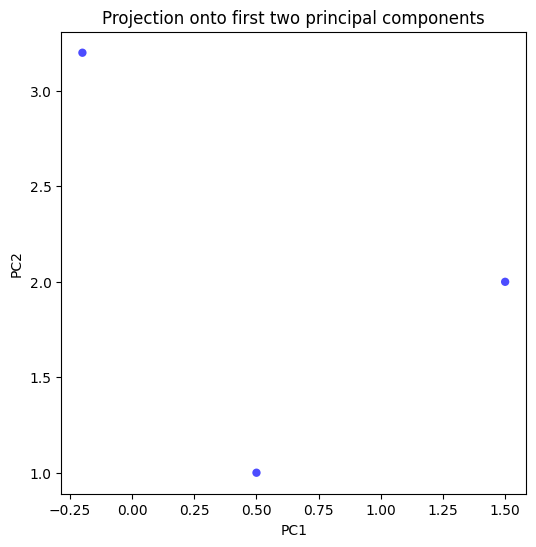

In [113]:
X_proj_data = [
        [0.5, 1.0],
        [1.5, 2.0],
        [-0.2, 3.2]
    ]
X_proj = Matrix(X_proj_data)

fig = plot_pca_projection(X_proj)
plt.show()

## Применение и иследование PCA

### 4.3 Задание (Expert): Исследовать влияние шума на PCA:

In [114]:
import math, random

def add_noise_and_compare(X: 'Matrix', noise_level: float = 0.1) -> None:
    """
    Вход:
      X: матрица данных (n×m)
      noise_level: уровень шума (доля от стандартного отклонения)
    Выход: результаты PCA до и после добавления шума.
    В этом задании можете проявить творческие способности, поэтому выходные данные не типизированы
    """
    n, m = X.rows, X.cols

    # 1) Считаем PCA на исходных данных
    X_proj_original, gamma_original, k_used_original, W, means = pca(X)

    print(f"[Before noise] k={k_used_original}, explained variance={gamma_original:.4f}")

    #   2) Добавляем шум
    #   Для каждого столбца j найдём std_j (ст. откл.),
    #   шум ~ N(0, std_j * noise_level)
    means = [0.0]*m
    for j in range(m):
        col_sum = 0.0
        for i in range(n):
            col_sum += X[i, j]
        means[j] = col_sum / n

    stdevs = [0.0] * m
    for j in range(m):
        var_sum = 0.0
        for i in range(n):
            diff = X[i, j] - means[j]
            var_sum += diff * diff
        stdev = math.sqrt(var_sum/(n-1)) if n>1 else 0.0
        stdevs[j] = stdev

    X_noisy = X.copy()
    for i in range(n):
        for j in range(m):
            noise = random.gauss(0.0, stdevs[j] * noise_level)
            old_val = X_noisy[i, j]
            X_noisy.set(i, j, old_val + noise)

    # 3) Считаем PCA на зашумлённых данных
    X_proj_noisy, gamma_noisy, k_used_noisy, W, means = pca(X_noisy)

    print(f"[After noise ] k={k_used_noisy}, explained variance={gamma_noisy:.4f}")

    diff_expl = gamma_noisy - gamma_original
    print(f"Difference in explained variance: {diff_expl:.4f}")

In [115]:
X_test = Matrix([
        [1.0, 2.0, 3.0],
        [1.5, 2.2, 2.9],
        [2.0, 2.5, 3.2],
        [4.0, 5.0, 6.0],
        [4.1, 5.2, 5.8],
        [4.2, 5.2, 5.9],
        [7.2, 8.2, 8.9],
        [7.5, 8.1, 8.7],
        [7.8, 8.3, 8.8],
        [7.9, 8.2, 8.5],
    ])

add_noise_and_compare(X_test, noise_level=0.2)

[Before noise] k=1, explained variance=0.9958
[After noise ] k=1, explained variance=0.9760
Difference in explained variance: -0.0198


### Дополниительные функции для обучения модели



In [116]:
def separate_features_target(data_matrix: Matrix) -> Tuple[Matrix, Matrix]:
    """
    Принимает матрицу, где последняя колонка считается целевой переменной
    Возвращает пару (X, y):
      - X: Matrix со всеми колонками, кроме последней
      - y: Matrix с единственной колонкой (последняя колонка исходной матрицы)
    """
    n, m = data_matrix.rows, data_matrix.cols
    X_data = []
    y_data = []
    for i in range(n):
        row = data_matrix.row(i)
        X_data.append(row[:-1])
        y_data.append([row[-1]])
    return Matrix(X_data), Matrix(y_data)


In [117]:
def transform_pca(X: Matrix, W: Matrix, means: List[float]) -> Matrix:
    """
    Преобразует тестовые данные X по матрице W и средним значениям means,
    используя ту же центрировку, что и обучающие данные
    X_proj = (X - means) @ W
    """
    n, m = X.rows, X.cols
    # Центрируем X с использованием means из обучающей выборки
    X_centered_data = []
    for i in range(n):
        row = []
        for j in range(m):
            row.append(X[i, j] - means[j])
        X_centered_data.append(row)
    X_centered = Matrix(X_centered_data)
    return X_centered @ W


In [118]:
def add_intercept_column(X: Matrix) -> Matrix:
    """Добавляем столбец из 1 (интерсепт) слева: X' (n×(m+1))"""
    n, m = X.rows, X.cols
    new_data = []
    for i in range(n):
        row = [1.0]  # intercept
        for j in range(m):
            row.append(X[i, j])
        new_data.append(row)
    return Matrix(new_data)

def train_linear_regression(X: Matrix, y: Matrix) -> Matrix:
    """
    Решаем w = (X^T X)^(-1) X^T y  (Normal Equation)
    X: (n×m), y: (n×1)
    Возвращаем w: (m×1)
    """
    # Добавим столбец 1
    X_aug = add_intercept_column(X)

    # w = (X^T X)^(-1) X^T y
    XT = X_aug.transpose()
    A = XT @ X_aug
    B = XT @ y

    w_vec = solve_system(A, B)

    w_mat = Matrix([[val] for val in w_vec])
    return w_mat

def predict_linear_regression(X: Matrix, w: Matrix) -> Matrix:
    """
    Предсказывает y = X_aug @ w
    X: (n×m), w: ((m+1)×1)
    Возвращает y_pred: (n×1)
    """
    X_aug = add_intercept_column(X)
    y_pred = X_aug @ w # (n×1)
    return y_pred

def mse(y_true: Matrix, y_pred: Matrix) -> float:
    """
    Среднеквадратичная ошибка
    y_true, y_pred: (n×1)
    """
    n = y_true.rows
    sse = 0.0
    for i in range(n):
        diff = y_true[i, 0] - y_pred[i, 0]
        sse += diff * diff

    return sse / n

### 4.4. Задание (Expert): Применить PCA к реальному датасету

Считывания датасета

In [119]:
def load_iris_csv(file_path: str) -> 'Matrix':
    """Считывает датасет Iris из CSV‑файла и возвращает экземпляр класса Matrix"""
    species_map = {
        "Iris-setosa": 1,
        "Iris-versicolor": 2,
        "Iris-virginica": 3
    }
    data = []
    with open(file_path, "r", encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            if len(row) < 6:
                continue
            try:
                # Преобразуем столбцы в нужные типы
                id_val = int(row[0].strip())
                sepal_length = float(row[1].strip())
                sepal_width = float(row[2].strip())
                petal_length = float(row[3].strip())
                petal_width = float(row[4].strip())
                species_label = species_map.get(row[5].strip())
                if species_label is None:
                    continue

                data.append([id_val, sepal_length, sepal_width, petal_length, petal_width, species_label])
            except Exception:
                continue

    return Matrix(data)

Применение Логистической регрессии вместе с PCA

Применение PCA к датасету

In [120]:
def apply_pca_to_dataset(dataset_name: str, k: int) -> Tuple['Matrix', float]:
    """
    Вход:
      dataset_name: название датасета
      k: число главных компонент
    Выход: кортеж (проекция данных, качество модели)
    """
    # Загружаем датасет
    X = load_iris_csv(dataset_name)

    # Разделяем данные на X и y
    X_data, y_data = separate_features_target(X)

    # Сохраняем исходные данные для сравнения
    X_original = X_data.copy()

    X_data_list = [X_data.row(i) for i in range(X_data.rows)]
    y_data_list = [y_data.row(i) for i in range(y_data.rows)]

    # Разделяем на обучающие и тестовые выборки
    split_index = int(0.8 * len(X_data_list))
    X_train = Matrix(X_data_list[:split_index])
    X_test = Matrix(X_data_list[split_index:])
    y_train = Matrix(y_data_list[:split_index])
    y_test = Matrix(y_data_list[split_index:])


    # Сравниваем метрики качества до и после PCA
    # Без применения PCA
    w_no_pca = train_linear_regression(X_train, y_train)
    y_pred_test_no_pca = predict_linear_regression(X_test, w_no_pca)
    no_pca_mse = mse(y_test, y_pred_test_no_pca)

    # С применением PCA
    X_train_pca, gamma, k_used, W, means_train = pca(X_train, k)
    X_test_pca = transform_pca(X_test, W, means_train)

    w_pca = train_linear_regression(X_train_pca, y_train)
    y_pred_test_pca = predict_linear_regression(X_test_pca, w_pca)
    pca_mse = mse(y_test, y_pred_test_pca)

    X_proj = X_train_pca

    # 7) Выводим результаты
    print(f"PCA на датасете '{dataset_name}':")
    print(f"  Исходные размерности: {X.rows} объектов, {X.cols} признаков.")
    print(f"  k_used={k_used}, доля объяснённой дисперсии={gamma:.4f}")
    print(f"  Итоговая матрица X_proj: {X_proj.rows}х{X_proj.cols}.")

    print("Метрики качества:")
    print(f"  MSE без PCA: {no_pca_mse:.4f}")
    print(f"  MSE с PCA: {pca_mse:.4f}")

    return X_proj, gamma

Тестирование времени поиска собственных значений

In [121]:
import time
import matplotlib.pyplot as plt
import random

def generate_random_matrix(n: int) -> Matrix:
    data = []
    for i in range(n):
        row = [random.random() for _ in range(n)]
        data.append(row)
    return Matrix(data)

def test_complexity_find_eigen(max_n=50, step=10):
    ns = []
    times = []

    for n in range(step, max_n+1, step):
        M = generate_random_matrix(n)

        start_time = time.time()
        _ = find_eigenvalues(M)
        end_time = time.time()

        ns.append(n)
        times.append(end_time - start_time)
        print(f"n={n}, time={times[-1]:.3f} s")

    # Строим график
    plt.plot(ns, times, marker='o')
    plt.xlabel('Matrix dimension n')
    plt.ylabel('Time (s)')
    plt.title('Time complexity of find_eigenvalues')
    plt.grid(True)
    plt.show()

n=5, time=0.196 s
n=10, time=1.594 s
n=15, time=7.378 s
n=20, time=15.363 s
n=25, time=36.741 s


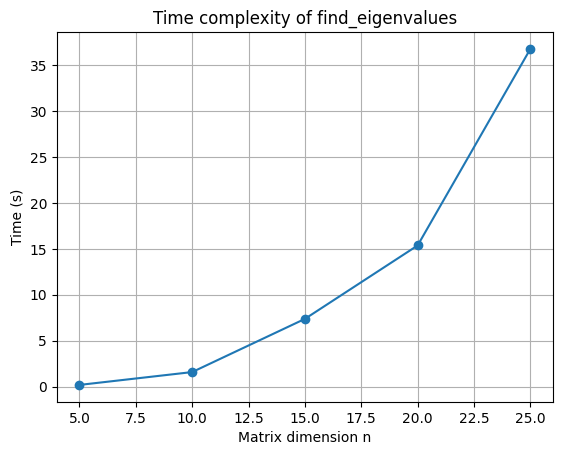

In [122]:
test_complexity_find_eigen(max_n=25, step=5)

In [123]:
apply_pca_to_dataset('/content/Iris.csv', None)

PCA на датасете '/content/Iris.csv':
  Исходные размерности: 150 объектов, 6 признаков.
  k_used=1, доля объяснённой дисперсии=0.9990
  Итоговая матрица X_proj: 120х1.
Метрики качества:
  MSE без PCA: 0.0420
  MSE с PCA: 0.0603


(<__main__.Matrix at 0x7ea6c1efc7d0>, 0.9989931772609826)

# Выводы
1.	Преимущества PCA:
    * Снижение размерности: Метод PCA позволяет эффективно снижать размерность данных, при этом сохраняя максимальную часть информации. Это достигается путем проекции данных на новые оси, которые соответствуют направлениям с наибольшей дисперсией.
    * Уменьшение вычислительных затрат: При работе с высокоразмерными данными уменьшение размерности значительно ускоряет дальнейшую обработку и анализ данных.
    * Улучшение визуализации: PCA полезен для визуализации данных в низкоразмерных пространствах (например, на 2D или 3D графиках), что позволяет исследователям и аналитикам лучше понять структуру данных.

2.	Применение PCA:
    * Анализ и уменьшение размерности реальных датасетов: PCA успешно применяется для анализа и уменьшения размерности реальных датасетов. В рамках лабораторной работы был использован классический датасет Iris, и PCA показал свою эффективность в визуализации данных.
    * Гибкость метода: PCA может быть использован не только для уменьшения размерности, но и для других задач, таких как шумоподавление, улучшение качества данных и преодоление проблемы многократных зависимостей между признаками.

В заключение, PCA является мощным и универсальным методом для обработки многомерных данных, улучшая производительность анализа и обеспечивая более глубокое понимание скрытых закономерностей в данных.